# **XGBoost: Predição de Custos de Plano de Saúde**

In [1]:
#Importando as bibliotecas
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## **1. Entrada de Dados**

In [2]:
#Importando os dados
df = pd.read_csv('insurance.csv')

#Visualizando tabela dos dados
df.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [3]:
#Breve descrição dos dados
df.describe()

age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000

In [4]:
# Separa variaveis
X = df.drop(columns='expenses')
y = df.expenses

In [5]:
# Variaveis de entrada
X

age     sex   bmi  children smoker     region
0      19  female  27.9         0    yes  southwest
1      18    male  33.8         1     no  southeast
2      28    male  33.0         3     no  southeast
3      33    male  22.7         0     no  northwest
4      32    male  28.9         0     no  northwest
...   ...     ...   ...       ...    ...        ...
1333   50    male  31.0         3     no  northwest
1334   18  female  31.9         0     no  northeast
1335   18  female  36.9         0     no  southeast
1336   21  female  25.8         0     no  southwest
1337   61  female  29.1         0    yes  northwest

[1338 rows x 6 columns]

In [6]:
# Alvo (Target)
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

## **2. Tratando Variáveis Categóricas**

In [7]:
# Trata variaveis categóricas - Parte 1
# Cria uma classificador para o IMC
def bmi_estimator(column):
  if column < 18.5:
    return 'underweight'
  elif (column >= 18.5) and (column<=24.9):
    return 'healthy weight'
  elif (column>=25) and (column<=29.9):
    return 'overweight'
  else:
    return 'obese'

In [8]:
X['bmi_class'] = df.bmi.map(bmi_estimator)
X

age     sex   bmi  children smoker     region       bmi_class
0      19  female  27.9         0    yes  southwest      overweight
1      18    male  33.8         1     no  southeast           obese
2      28    male  33.0         3     no  southeast           obese
3      33    male  22.7         0     no  northwest  healthy weight
4      32    male  28.9         0     no  northwest      overweight
...   ...     ...   ...       ...    ...        ...             ...
1333   50    male  31.0         3     no  northwest           obese
1334   18  female  31.9         0     no  northeast           obese
1335   18  female  36.9         0     no  southeast           obese
1336   21  female  25.8         0     no  southwest      overweight
1337   61  female  29.1         0    yes  northwest      overweight

[1338 rows x 7 columns]

In [9]:
# Trata variaveis categóricas - Parte 2
# Trata variaveis categóricas (Sexo e Fumante) - binárias

sex_dict = {'male':0, 'female':1}
smoker_dict = {'no':0, 'yes':1}
X['sex'] = X.sex.map(sex_dict)
X['smoker'] = X.smoker.map(smoker_dict)
X

age  sex   bmi  children  smoker     region       bmi_class
0      19    1  27.9         0       1  southwest      overweight
1      18    0  33.8         1       0  southeast           obese
2      28    0  33.0         3       0  southeast           obese
3      33    0  22.7         0       0  northwest  healthy weight
4      32    0  28.9         0       0  northwest      overweight
...   ...  ...   ...       ...     ...        ...             ...
1333   50    0  31.0         3       0  northwest           obese
1334   18    1  31.9         0       0  northeast           obese
1335   18    1  36.9         0       0  southeast           obese
1336   21    1  25.8         0       0  southwest      overweight
1337   61    1  29.1         0       1  northwest      overweight

[1338 rows x 7 columns]

In [10]:
# Agora transforma as variaveis categoricas em numéricas
columns_to_encode = ['region', 'bmi_class']

In [11]:
# Utiliza o OneHotEncoder para tratar as variáveis categóricas
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(X[columns_to_encode])
encoded_cols = list(encoder.get_feature_names_out(columns_to_encode))
X[encoded_cols] = encoder.transform(X[columns_to_encode])

In [12]:
X

age  sex   bmi  children  smoker     region       bmi_class  \
0      19    1  27.9         0       1  southwest      overweight   
1      18    0  33.8         1       0  southeast           obese   
2      28    0  33.0         3       0  southeast           obese   
3      33    0  22.7         0       0  northwest  healthy weight   
4      32    0  28.9         0       0  northwest      overweight   
...   ...  ...   ...       ...     ...        ...             ...   
1333   50    0  31.0         3       0  northwest           obese   
1334   18    1  31.9         0       0  northeast           obese   
1335   18    1  36.9         0       0  southeast           obese   
1336   21    1  25.8         0       0  southwest      overweight   
1337   61    1  29.1         0       1  northwest      overweight   

      region_northeast  region_northwest  region_southeast  region_southwest  \
0                  0.0               0.0               0.0               1.0   
1                  0.0               0.0               1.0               0.0   
2                  0.0               0.0               1.0               0.0   
3                  0.0               1.0               0.0               0.0   
4                  0.0               1.0               0.0               0.0   
...                ...               ...               ...               ...   
1333               0.0               1.0               0.0               0.0   
1334               1.0               0.0               0.0               0.0   
1335               0.0               0.0               1.0               0.0   
1336               0.0               0.0               0.0               1.0   
1337               0.0               1.0               0.0               0.0   

      bmi_class_healthy weight  bmi_class_obese  bmi_class_overweight  \
0                          0.0              0.0                   1.0   
1                          0.0              1.0                   0.0   
2                          0.0              1.0                   0.0   
3                          1.0              0.0                   0.0   
4                          0.0              0.0                   1.0   
...                        ...              ...                   ...   
1333                       0.0              1.0                   0.0   
1334                       0.0              1.0                   0.0   
1335                       0.0              1.0                   0.0   
1336                       0.0              0.0                   1.0   
1337                       0.0              0.0                   1.0   

      bmi_class_underweight  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  
...                     ...  
1333                    0.0  
1334                    0.0  
1335                    0.0  
1336                    0.0  
1337                    0.0  

[1338 rows x 15 columns]

In [13]:
X = X.drop(columns='region')
X

age  sex   bmi  children  smoker       bmi_class  region_northeast  \
0      19    1  27.9         0       1      overweight               0.0   
1      18    0  33.8         1       0           obese               0.0   
2      28    0  33.0         3       0           obese               0.0   
3      33    0  22.7         0       0  healthy weight               0.0   
4      32    0  28.9         0       0      overweight               0.0   
...   ...  ...   ...       ...     ...             ...               ...   
1333   50    0  31.0         3       0           obese               0.0   
1334   18    1  31.9         0       0           obese               1.0   
1335   18    1  36.9         0       0           obese               0.0   
1336   21    1  25.8         0       0      overweight               0.0   
1337   61    1  29.1         0       1      overweight               0.0   

      region_northwest  region_southeast  region_southwest  \
0                  0.0               0.0               1.0   
1                  0.0               1.0               0.0   
2                  0.0               1.0               0.0   
3                  1.0               0.0               0.0   
4                  1.0               0.0               0.0   
...                ...               ...               ...   
1333               1.0               0.0               0.0   
1334               0.0               0.0               0.0   
1335               0.0               1.0               0.0   
1336               0.0               0.0               1.0   
1337               1.0               0.0               0.0   

      bmi_class_healthy weight  bmi_class_obese  bmi_class_overweight  \
0                          0.0              0.0                   1.0   
1                          0.0              1.0                   0.0   
2                          0.0              1.0                   0.0   
3                          1.0              0.0                   0.0   
4                          0.0              0.0                   1.0   
...                        ...              ...                   ...   
1333                       0.0              1.0                   0.0   
1334                       0.0              1.0                   0.0   
1335                       0.0              1.0                   0.0   
1336                       0.0              0.0                   1.0   
1337                       0.0              0.0                   1.0   

      bmi_class_underweight  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  
...                     ...  
1333                    0.0  
1334                    0.0  
1335                    0.0  
1336                    0.0  
1337                    0.0  

[1338 rows x 14 columns]

In [15]:
# Coloca as variáveis continuas numa escala padronizada
columns_to_scale = ['age', 'bmi', 'children']
X[columns_to_scale].head()

age   bmi  children
0   19  27.9         0
1   18  33.8         1
2   28  33.0         3
3   33  22.7         0
4   32  28.9         0

## **Por que normalizar antes do ajuste do modelo?**
A ideia principal por trás da **normalização/padronização** é sempre a mesma. As variáveis ​​que são medidas em escalas diferentes não contribuem igualmente para o ajuste do modelo e função aprendida do modelo e podem acabar criando um **viés** . Assim, para lidar com esse problema potencial, a normalização de recursos, como **MinMax Scaling**, geralmente é usada antes do ajuste do modelo.

Isso pode ser muito útil para alguns modelos de ML, como **Perceptrons de várias camadas ( MLP )**, em que a retropropagação pode ser mais estável e até mais rápida quando os recursos de entrada são dimensionados para mínimo-máximo (ou em escala geral) em comparação com o uso do original dados não dimensionados.

Observação: os modelos baseados em árvore geralmente não dependem do dimensionamento, mas os modelos que não são de árvore, como SVM, LDA, etc., costumam ser extremamente dependentes dele.

In [16]:
# Melhoria. Coloca os dados numericos em uma scala entre 0 e 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X[columns_to_scale])
X[columns_to_scale] = scaler.transform(X[columns_to_scale])

In [17]:
X = X.drop(columns='bmi_class')
X.head()

age  sex       bmi  children  smoker  region_northeast  \
0  0.021739    1  0.320755       0.0       1               0.0   
1  0.000000    0  0.479784       0.2       0               0.0   
2  0.217391    0  0.458221       0.6       0               0.0   
3  0.326087    0  0.180593       0.0       0               0.0   
4  0.304348    0  0.347709       0.0       0               0.0   

   region_northwest  region_southeast  region_southwest  \
0               0.0               0.0               1.0   
1               0.0               1.0               0.0   
2               0.0               1.0               0.0   
3               1.0               0.0               0.0   
4               1.0               0.0               0.0   

   bmi_class_healthy weight  bmi_class_obese  bmi_class_overweight  \
0                       0.0              0.0                   1.0   
1                       0.0              1.0                   0.0   
2                       0.0              1.0                   0.0   
3                       1.0              0.0                   0.0   
4                       0.0              0.0                   1.0   

   bmi_class_underweight  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0

In [18]:
# Verifica se nao tem nenhuma discrepancia
X.describe().loc[['min','max']]

age  sex  bmi  children  smoker  region_northeast  region_northwest  \
min  0.0  0.0  0.0       0.0     0.0               0.0               0.0   
max  1.0  1.0  1.0       1.0     1.0               1.0               1.0   

     region_southeast  region_southwest  bmi_class_healthy weight  \
min               0.0               0.0                       0.0   
max               1.0               1.0                       1.0   

     bmi_class_obese  bmi_class_overweight  bmi_class_underweight  
min              0.0                   0.0                    0.0  
max              1.0                   1.0                    1.0

# **3. Modelo XGBoost**

Extreme Gradient Boosting (XGBoost) é uma biblioteca de código aberto que fornece uma implementação eficiente e eficaz do algoritmo de aumento de gradiente.

Logo após seu desenvolvimento e lançamento inicial, o XGBoost tornou-se o método preferencial e, muitas vezes, o componente-chave na obtenção de soluções para uma série de problemas em competições de aprendizado de máquina.

O aumento de gradiente refere-se a uma classe de algoritmos de aprendizado de máquina que podem ser usados para **problemas de modelagem preditiva de classificação ou regressão**.

## **Ensembles**

Ensembles são **combinações de diferentes modelos chamados de “modelos fracos” ou “modelos base”** para a criação de um **modelos mais forte**. E existem 3 principais tipos de ensemble.

Quando se cria um modelo de machine learning devemos buscar por um **equilíbrio entre variância e viés**. Alguns modelos por suas peculiaridades matemáticas possuem maior variância ou maior potencial de overfitting e obter um viés. O ensemble é uma tentativa de achar esse equilíbrio.

**Existem 3 principais formas de se agruparem modelos:**
*   Bagging
*   Boosting
*   Stacking

O ensemble XGBoost é construído a partir de modelos de árvore de decisão. As árvores são adicionadas uma de cada vez ao conjunto e ajustadas para corrigir os erros de previsão feitos pelos modelos anteriores. Esse é um tipo de modelo de aprendizado de máquina ensemble conhecido como **boosting**.

Os modelos são ajustados usando qualquer função de perda diferenciável arbitrária e algoritmo de **otimização de gradiente descendente**. Isso dá à técnica seu nome, “aumento de gradiente” (XG), pois o gradiente de perda é minimizado conforme o modelo é ajustado, muito parecido com uma rede neural.

In [19]:
#Separando os dados de Treino e Teste
# Faz a divisão dos datasets em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from xgboost import XGBRegressor

In [24]:
model_xgboost = XGBRegressor(n_jobs=-1, n_estimators=1000, early_stopping_rounds=50, random_state=42)
model_xgboost.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test,y_test)])

[0]	validation_0-rmse:13024.29347	validation_1-rmse:12984.88844
[1]	validation_0-rmse:9667.17712	validation_1-rmse:9653.42315
[2]	validation_0-rmse:7425.10986	validation_1-rmse:7490.90182
[3]	validation_0-rmse:5968.62044	validation_1-rmse:6161.73464
[4]	validation_0-rmse:5053.74391	validation_1-rmse:5326.11792
[5]	validation_0-rmse:4451.63767	validation_1-rmse:4921.36213
[6]	validation_0-rmse:4086.43012	validation_1-rmse:4672.88020
[7]	validation_0-rmse:3830.18016	validation_1-rmse:4594.68862
[8]	validation_0-rmse:3641.01653	validation_1-rmse:4537.57184
[9]	validation_0-rmse:3492.91052	validation_1-rmse:4543.89106
[10]	validation_0-rmse:3367.33920	validation_1-rmse:4531.11037
[11]	validation_0-rmse:3281.23600	validation_1-rmse:4545.00364
[12]	validation_0-rmse:3236.12397	validation_1-rmse:4554.23635
[13]	validation_0-rmse:3169.68941	validation_1-rmse:4572.76582
[14]	validation_0-rmse:3130.36869	validation_1-rmse:4580.44331
[15]	validation_0-rmse:3042.44329	validation_1-rmse:4620.51847


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [26]:
feature_importance_df = pd.DataFrame({
    'Feature':X.columns,
    'Importance':model_xgboost.feature_importances_
})

feature_importance_df.sort_values('Importance', ascending=False)

Feature  Importance
4                     smoker    0.904943
2                        bmi    0.023377
0                        age    0.015556
9   bmi_class_healthy weight    0.011506
8           region_southwest    0.008716
6           region_northwest    0.007270
5           region_northeast    0.007120
11      bmi_class_overweight    0.006042
3                   children    0.005965
7           region_southeast    0.005312
1                        sex    0.004192
10           bmi_class_obese    0.000000
12     bmi_class_underweight    0.000000

<Axes: xlabel='Importance', ylabel='Feature'>

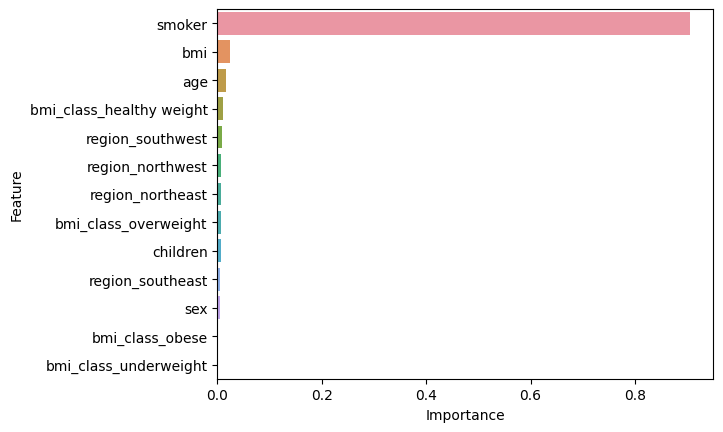

In [27]:
sns.barplot(data=feature_importance_df.sort_values('Importance', ascending=False), y='Feature', x='Importance')

In [29]:
# Verificando o resultado do modelo com o teste (predição)
y_pred = model_xgboost.predict(X_test)
y_pred

array([10305.799 ,  5595.551 , 26835.852 ,  9314.859 , 34114.98  ,
        5634.52  ,  1451.5039, 14038.986 ,  5067.463 , 12552.089 ,
       17711.66  ,  7403.6255,  4921.5503, 44722.46  , 46758.33  ,
       44140.63  , 10201.851 , 42458.906 , 10462.531 , 23397.168 ,
        5048.5723,  9768.004 ,  2938.679 ,  3117.8567, 11500.382 ,
       12968.214 , 14213.917 ,  6749.579 , 12096.021 ,  3194.1316,
        7502.7153, 12153.369 ,  2788.914 ,  4808.965 ,  3228.2498,
        9498.498 ,  3694.7651,  8136.865 , 23267.043 , 38354.957 ,
        5137.043 ,  5504.191 , 14199.754 , 16105.374 ,  6625.8516,
       13294.008 , 11120.731 ,  4543.0117, 41632.645 ,  6199.355 ,
       15677.149 ,  3490.9788,  6687.315 ,  1540.8527, 12353.652 ,
       10607.354 ,  3074.3877, 38971.293 , 12330.095 , 13688.217 ,
       13493.914 ,  5301.6387, 17967.975 ,  7026.0283, 11507.643 ,
        5591.637 , 17336.732 , 12579.666 ,  5993.991 ,  2766.5906,
        7578.1016, 13579.936 , 10484.263 ,  7749.2085,  8701.1

In [ ]:
# Avaliando o modelo
r2 = r2_score(y_test, y_pred)
print('Coeficiente de Determinação (R²):', r2)

# **4.Perfomance do Modelo**

In [ ]:
rmse = mean_squared_error(y_test, model_xgboost.predict(X_test), squared=False)
nrmse = rmse/(max(y)-min(y))

print('The RMSE is: {}'.format(rmse))
print('The NRMSE is: {}'.format(nrmse))